In [19]:
import pandas as pd
import numpy as np
import re
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense,LSTM
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from sklearn.metrics import classification_report


In [14]:
df=pd.read_csv("C:\\Users\\krish\Videos\\MK_Stalin.csv")
df

,Tweet
0,Frequent underground bombings in my city. I wa...
1,@kharge Respected leader of opposition the ele...
2,Mr. @mkstalin Today SC slapped you hard on you...
3,"The meeting was attended by ACS, MAWS; Pr. Sec..."
4,@amarprasadreddy @mkstalin Time Has Come Once ...
...,...
74995,@V_Senthilbalaji @mkstalin When will you start...
74996,@tejashwini_v__ @LSEnews @PMOIndia @HCI_London...
74997,@Profdilipmandal @mkstalin @PWilsonDMK Why do ...
74998,Tamil Nadu Government should take steps to set...


In [20]:
def clean_tweet(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    return tweet

df['Cleaned_Tweet'] = df['Tweet'].apply(clean_tweet)

In [21]:
from textblob import TextBlob

def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

df['Sentiment_Score'] = df['Cleaned_Tweet'].apply(get_sentiment)
df['Sentiment'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

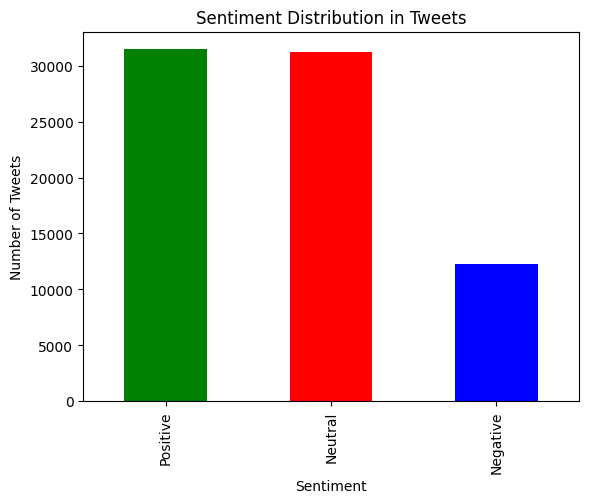

In [22]:
import matplotlib.pyplot as plt

sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Distribution in Tweets')
plt.show()

In [17]:
df.describe()

,Tweet
count,75000
unique,9878
top,@RRajakannappan @mkstalin @Udhaystalin @arival...
freq,84


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   75000 non-null  object
dtypes: object(1)
memory usage: 586.1+ KB


In [16]:
Tweet=df['Tweet']

In [6]:
labeled_tweets=[]
labels=[]
for tweet in Tweet:
    blob = TextBlob(tweet)
    sentiment = blob.sentiment.polarity  # Sentiment polarity ranges from -1 to 1
    labeled_tweets.append(tweet)
    labels.append(1 if sentiment >= 0 else 0)  # Assign label 1 for positive sentiment, 0 for negative sentiment

In [7]:
# Step 3: Feature Extraction
tokenizer = Tokenizer()
tokenizer.fit_on_texts(labeled_tweets)
sequences = tokenizer.texts_to_sequences(labeled_tweets)
word_index = tokenizer.word_index
max_length = max(len(seq) for seq in sequences)
data = pad_sequences(sequences, maxlen=max_length)

In [8]:
# Step 4: Split the Data
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
# Convert to NumPy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Step 5: Model Training
embedding_dim = 100  # Define the dimensionality of word embeddings

model = Sequential()
model.add(Embedding(len(word_index) + 1, embedding_dim, input_length=max_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 36s 75ms/step - loss: 0.1631 - accuracy: 0.9390 - val_loss: 0.0086 - val_accuracy: 0.9981
Epoch 2/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0023 - accuracy: 0.9997 - val_loss: 6.6820e-04 - val_accuracy: 1.0000
Epoch 3/10
469/469 [==============================] - 35s 74ms/step - loss: 3.0613e-04 - accuracy: 1.0000 - val_loss: 1.8628e-04 - val_accuracy: 1.0000
Epoch 4/10
469/469 [==============================] - 38s 81ms/step - loss: 1.1790e-04 - accuracy: 1.0000 - val_loss: 9.0333e-05 - val_accuracy: 1.0000
Epoch 5/10
469/469 [==============================] - 33s 71ms/step - loss: 6.1686e-05 - accuracy: 1.0000 - val_loss: 5.2319e-05 - val_accuracy: 1.0000
Epoch 6/10
469/469 [==============================] - 33s 70ms/step - loss: 3.6847e-05 - accuracy: 1.0000 - val_loss: 3.3046e-05 - val_accuracy: 1.0000
Epoch 7/10
469/469 [==============================] - 34s 72ms/step - loss: 2.3670e-05 - accuracy: 1

In [10]:
# Step 6: Model Evaluation
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

469/469 [==============================] - 4s 8ms/step - loss: 7.6392e-06 - accuracy: 1.0000
Test Loss: 7.639212526555639e-06, Test Accuracy: 1.0


In [11]:
y_pred_prob = model.predict(x_test)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

469/469 [==============================] - 4s 7ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2465
           1       1.00      1.00      1.00     12535

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

